In [1]:
import pandas as pd

In [2]:
tt = pd.read_csv(r'C:\Users\dngo6\Downloads\titanic.csv')

In [3]:
print(tt.to_string)

<bound method DataFrame.to_string of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                              

In [4]:
tt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
tt.iloc[99]

PassengerId                  100
Survived                       0
Pclass                         2
Name           Kantor, Mr. Sinai
Sex                         male
Age                         34.0
SibSp                          1
Parch                          0
Ticket                    244367
Fare                        26.0
Cabin                        NaN
Embarked                       S
Name: 99, dtype: object

In [6]:
tt.tail

<bound method NDFrame.tail of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [7]:
tt.loc[[5], 'Age'] = 25

In [8]:
tt.iloc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                        25.0
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

In [9]:
threshold = 18 
agefilteredtt = tt[tt['Age'] > threshold]
filteredage = agefilteredtt['Age'].count()
print(filteredage)

576


In [10]:
for person in tt["Sex"]:
    count = 0
    if person == "male":
        count = count + 1
count = (count / len(tt))*100
print(count)

0.11223344556677892


In [11]:
frequency_table = tt['Pclass'].value_counts()
frequencydata = frequency_table.reset_index()
frequencydata.columns = ['Passenger Class', 'Number of Tickets']
frequencydata.to_csv('classtable.csv', index=False)
ftb = pd.read_csv('classtable.csv')
print(ftb)

   Passenger Class  Number of Tickets
0                3                491
1                1                216
2                2                184


In [12]:
ports = tt['Embarked'].value_counts(normalize=True)*100
ttports = pd.DataFrame(ports)
print(ttports)

    Embarked
S  72.440945
C  18.897638
Q   8.661417


In [13]:
tt.loc[tt['PassengerId']==528]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S


In [14]:
tt.loc[tt['Name'].str.contains('Fannie')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5,NaN,S


In [15]:
estonia = pd.read_csv(r'C:\Users\dngo6\Downloads\estonia.csv')
estoniadata = pd.DataFrame(estonia)
estoniaft = estoniadata['Age'].value_counts(normalize=True)*100
print(estoniaft.to_string)

<bound method Series.to_string of 21    2.730030
45    2.730030
30    2.527806
67    2.527806
50    2.426694
        ...   
9     0.101112
15    0.101112
0     0.101112
2     0.101112
87    0.101112
Name: Age, Length: 78, dtype: float64>


In [16]:
pd.crosstab(index=tt['Sex'], columns=tt['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [17]:
maleSurvive = 0
femaleSurvive = 0
maleDied = 0
femaleDied = 0
for idx in range(len(tt)):
    if tt.loc[idx]['Sex'] == 'male' and tt.loc[idx]['Survived']== 0:
        maleDied+=1
    if tt.loc[idx]['Sex'] == 'male' and tt.loc[idx]['Survived']==1:
        maleSurvive+=1
    if tt.loc[idx]['Sex'] == 'female' and tt.loc[idx]['Survived']==0:
        femaleDied+=1
    if tt.loc[idx]['Sex'] =='female' and tt.loc[idx]['Survived']==1:
        femaleSurvive+=1
genderctable= pd.DataFrame({
    'Male' : [maleSurvive, maleDied],
    'Female' : [femaleSurvive, femaleDied]

}, index=['Died', 'Survived'])
print(genderctable.head())

          Male  Female
Died       109     233
Survived   468      81


In [18]:
agebins = [0, 18, 35, 55]
agelabels = ['Minor', 'Medium', 'Major']
tt['agegroup'] = pd.cut(tt['Age'], bins=agebins, labels=agelabels, right=False)
print(tt)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [19]:
minorSurvive = 0
mediumSurvive = 0
majorSurvive = 0
minorDied = 0
mediumDied = 0
majorDied = 0
for idx in range(len(tt)):
    if tt.loc[idx]['agegroup'] == 'Minor' and tt.loc[idx]['Survived']== 0:
        minorDied+=1
    if tt.loc[idx]['agegroup'] == 'Minor' and tt.loc[idx]['Survived']==1:
        minorSurvive+=1
    if tt.loc[idx]['agegroup'] == 'Medium' and tt.loc[idx]['Survived']==0:
        mediumDied+=1
    if tt.loc[idx]['agegroup'] =='Medium' and tt.loc[idx]['Survived']==1:
        mediumSurvive+=1
    if tt.loc[idx]['agegroup'] == 'Major' and tt.loc[idx]['Survived']==0:
        majorDied+=1
    if tt.loc[idx]['agegroup'] =='Major' and tt.loc[idx]['Survived']==1:
        majorSurvive+=1
ctable = {
    'Minor': [minorSurvive, minorDied],
    'Medium': [mediumSurvive, mediumDied],
    'Major': [majorSurvive, majorDied]
}
agectable = pd.DataFrame(ctable, index=['Survived', 'Died'])
agectable.loc['Total']=agectable.loc['Survived']+agectable.loc['Died']


In [33]:
csurvive = 0
cdied = 0
ssurvive = 0
sdied = 0
qsurvive = 0
qdied = 0
for idx in range(len(tt)):
    if tt.loc[idx]['Embarked'] == 'S' and tt.loc[idx]['Survived']== 0:
        sdied+=1
    if tt.loc[idx]['Embarked'] == 'S' and tt.loc[idx]['Survived']==1:
        ssurvive+=1
    if tt.loc[idx]['Embarked'] == 'C' and tt.loc[idx]['Survived']==0:
        cdied+=1
    if tt.loc[idx]['Embarked'] =='C' and tt.loc[idx]['Survived']==1:
        csurvive+=1
    if tt.loc[idx]['Embarked'] == 'Q' and tt.loc[idx]['Survived']==0:
        qdied+=1
    if tt.loc[idx]['Embarked'] =='Q' and tt.loc[idx]['Survived']==1:
        qsurvive+=1
embarkedtable = {
    'S': [ssurvive, sdied],
    'C': [csurvive, cdied],
    'Q': [qsurvive, qdied]
}
embarkedsurvivetable = pd.DataFrame(embarkedtable, index=['Survived', 'Died'])
embarkedtotal==embarkedsurvivetable.loc['Survived']+embarkedsurvivetable.loc['Died']
embarkedpercentage=embarkedsurvivetable.copy()
embarkedpercentage.loc['Survived'] = (embarkedpercentage.loc['Survived']/embarkedtotal)*100
embarkedpercentage.loc['Died'] = (embarkedpercentage.loc['Died']/embarkedtotal)*100
print(embarkedpercentage)

                  S          C          Q
Survived  33.695652  55.357143  38.961039
Died      66.304348  44.642857  61.038961


<function matplotlib.pyplot.show(close=None, block=None)>

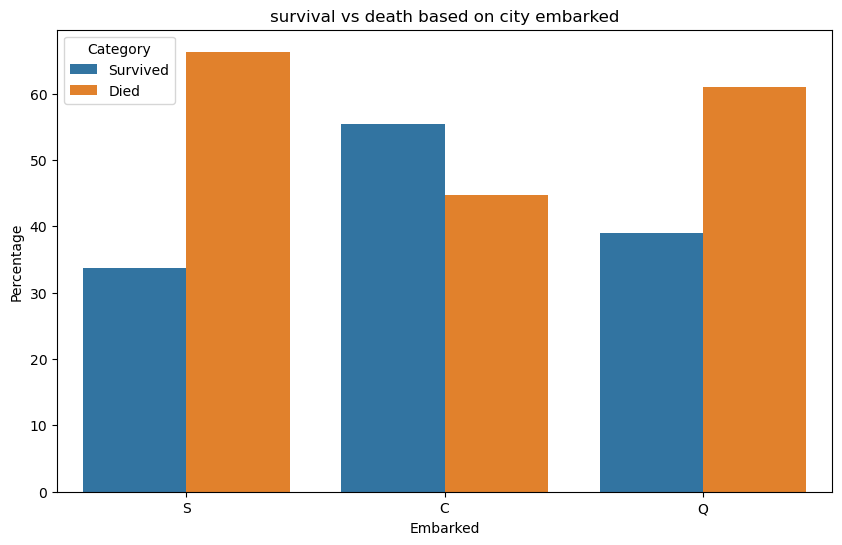

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
embarkedlongformat = embarkedpercentage.reset_index().melt(id_vars='index', var_name='Embarked', value_name='Percentage')
embarkedlongformat.columns = ['Category', 'Embarked', 'Percentage']

plt.figure(figsize=(10,6))
sns.barplot(data=embarkedlongformat, x='Embarked', y='Percentage', hue='Category')
plt.title('survival vs death based on city embarked')
plt.xlabel('Embarked')
plt.ylabel('Percentage')
plt.legend(title='Category')
plt.show